In [1]:
import os
import globals as gl
import nitools as nt
from imaging_pipelines.vis import plot_surf
from matplotlib.colors import LinearSegmentedColormap, Normalize
import nibabel as nb
import numpy as np
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /home/UWO/memanue5/Documents/GitHub/extension-flexion-chords/extension-flexion-chords/atlases


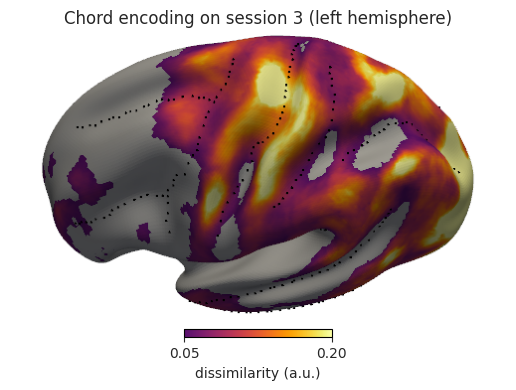

In [2]:
cmap = 'inferno'
thresh = 0.05
vmin, vmax = 0, .2
H = 'L'

gifti = nb.load(os.path.join(gl.baseDir, gl.surfDir, f'searchlight.encoding.session03.{H}.func.gii'))
data = nt.get_gifti_data_matrix(gifti)
data = data.mean(axis=1)[:, None]
#data = np.full(data.shape, np.nan)

fig, ax = plt.subplots()
fig, ax = plot_surf(fig, ax, data, H, cmap=cmap, col=0, vmin=vmin, vmax=vmax, thresh=thresh)

# ---- add colorbar ----
norm =Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04, orientation='horizontal')
cbar.set_label('dissimilarity (a.u.)')
cbar.ax.set_xlim(thresh, vmax)
cbar.ax.set_xticks([thresh, vmax])
cbar.outline.set_edgecolor('k')

ax.set_title('Chord encoding on session 3 (left hemisphere)')

plt.show()